# Requirement 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def UniformQuantizer(in_val, n_bits, xmax, m):
    L = 2 ** n_bits
    delta = 2 * xmax / L
    q_ind = np.floor((in_val + xmax + m * delta / 2) / delta)
    q_ind = np.clip(q_ind, 0, L - 1)
    return q_ind.astype(int)

# Requirement 2

In [2]:
def UniformDequantizer(q_ind, n_bits, xmax, m):
    L = 2**n_bits
    delta = 2 * xmax / L
    deq_val = (q_ind * delta) - (m * delta / 2) - xmax + delta / 2
    return deq_val

# Requirment 3

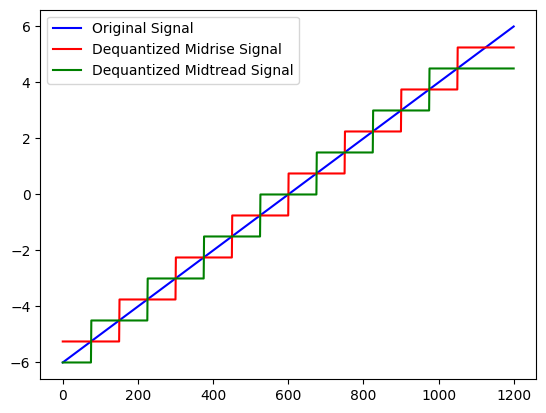

In [3]:
def test():
    ramp_signal = np.arange(-6, 6.01, 0.01)
    n_bits = 3
    xmax = 6
    q_ind_midtread = UniformQuantizer(ramp_signal, n_bits, xmax, 1)
    deq_val_midtread = UniformDequantizer(q_ind_midtread, n_bits, xmax, 1)
    q_ind_midrise = UniformQuantizer(ramp_signal, n_bits, xmax, 0)
    deq_val_midrise = UniformDequantizer(q_ind_midrise, n_bits, xmax, 0)

    plt.plot(ramp_signal, color="b", label="Original Signal")
    plt.plot(deq_val_midrise, color="r", label="Dequantized Midrise Signal")
    plt.plot(deq_val_midtread, color="g", label="Dequantized Midtread Signal")
    plt.legend()
    plt.show()
test()

### Test Four

In [4]:
def plot_SNR(random_signal: np.ndarray) -> None:
    n_bits = np.arange(2, 9)
    xmax = 5
    m = 0

    simulated_SNR_values = []
    theoritical_SNR_values = []

    for bits in n_bits:
        q_ind = UniformQuantizer(in_val=random_signal, n_bits=bits, xmax=xmax, m=m)
        deq_val = UniformDequantizer(q_ind=q_ind, n_bits=bits, xmax=xmax, m=m)

        quantization_error = random_signal - deq_val

        E_x2 = np.mean(random_signal**2)
        E_error2 = np.mean(quantization_error**2)

        simulated_SNR = E_x2 / E_error2

        simulated_SNR_db = 10 * np.log10(simulated_SNR)
        theoritical_SNR_db = 10 * np.log10(4) * bits

        theoritical_SNR_values.append(theoritical_SNR_db)
        simulated_SNR_values.append(simulated_SNR_db)

    plt.plot(n_bits, theoritical_SNR_values, "ro--", label="Theoritical SNR")
    plt.plot(n_bits, simulated_SNR_values, "bo", label="Simulation SNR")
    plt.xlabel(r"$n_{bits}$")
    plt.ylabel(r"$SNR_{db}$")
    plt.title(f"Comparison Between Theoritical SNR and Simulated SNR")
    plt.legend()
    plt.show()

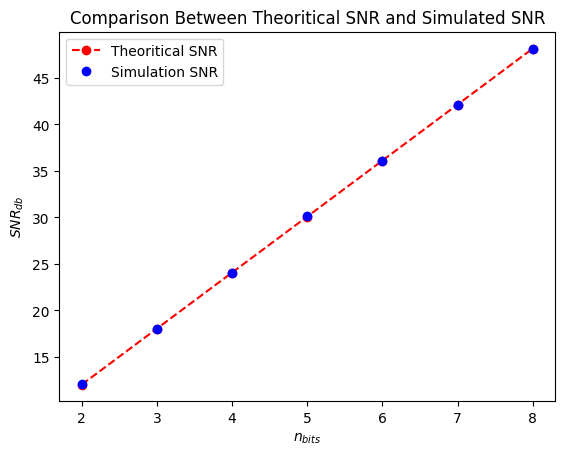

In [6]:
# xmax =max(abs(random_signal))
input_signal = np.random.uniform(low=-5, high=5, size=10000)
plot_SNR(random_signal=input_signal)

# Requirement 5

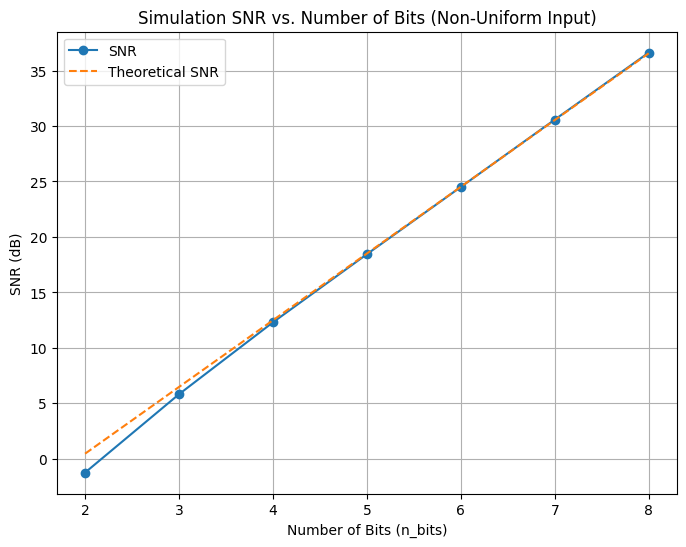

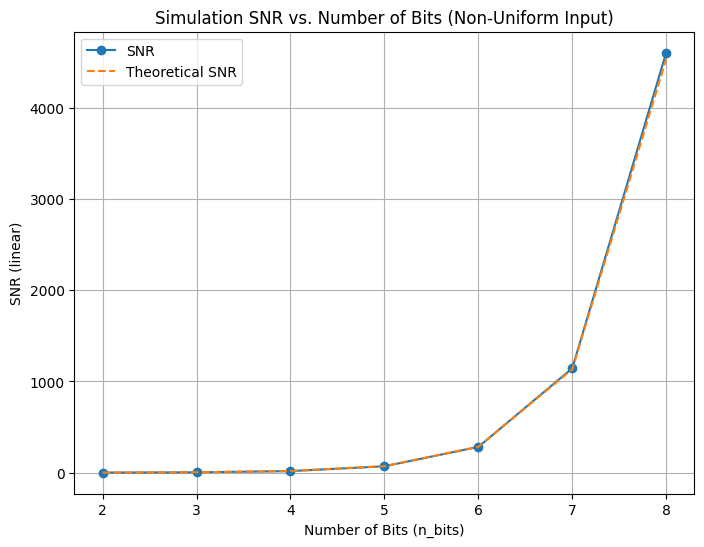

In [12]:

def plot_SNR_nonuniform(x,Sim,Theo,Sim_labels,Theo_labels,xlabel,ylabel,title):
    plt.figure(figsize=(8, 6))
    for i in range(len(Sim_labels)):
        plt.plot(x, Sim[i],marker='o', label=Sim_labels[i])
        plt.plot(x, Theo[i],linestyle='--',label=Theo_labels[i])
        i = i + 1
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

np.random.seed(42)
num_samples = 10000
polarity = np.random.choice([-1, 1], size=num_samples, p=[0.5, 0.5])
magnitude = np.random.exponential(size=num_samples)
input_signal = polarity * magnitude

xmax = max(abs(input_signal))
m = 0
n_bits_range = range(2, 9)

snr_values = []
theoretical_snr = []
for n_bits in n_bits_range:
    q_ind = UniformQuantizer(input_signal, n_bits, xmax, m)
    
    deq_val = UniformDequantizer(q_ind, n_bits, xmax, m)
    
    quant_error = input_signal - deq_val
    
    snr = np.mean(input_signal**2) / np.mean(quant_error**2)
    snr_values.append(snr) 
    input_power = np.mean(input_signal**2)
    theoretical_snr.append((3 * (2 ** n_bits) ** 2 * input_power) /xmax**2)

plot_SNR_nonuniform(n_bits_range, [10 * np.log10(snr_values)],[10 * np.log10(theoretical_snr)], ['SNR'],['Theoretical SNR'], 'Number of Bits (n_bits)', 'SNR (dB)', 'Simulation SNR vs. Number of Bits (Non-Uniform Input)')
plot_SNR_nonuniform(n_bits_range, [snr_values],[theoretical_snr], ['SNR'],['Theoretical SNR'], 'Number of Bits (n_bits)', 'SNR (linear)', 'Simulation SNR vs. Number of Bits (Non-Uniform Input)')


### Requirement Six

In [13]:
def mu_law_compression(x, mu):
    return np.sign(x) * ((np.log1p(mu * np.abs(x))) / np.log1p(mu))


def mu_law_expansion(y, mu):
    return np.sign(y) * ((1 + mu) ** np.abs(y) - 1) / mu

# def mu_law_quantizer(in_val, n_bits, xmax, m, mu):
#     compressed_signal = mu_law_compression(x=(in_val / xmax), mu=mu)
#     q_ind = UniformQuantizer(in_val=compressed_signal, n_bits=n_bits, xmax=1, m=m)
#     deq_val = UniformDequantizer(q_ind=q_ind, n_bits=n_bits, xmax=1, m=m)
#     expanded_signal = mu_law_expansion(y=deq_val, mu=mu) * xmax
#     return expanded_signal


def plot_compressed_signal_SNR(input_signal: np.ndarray) -> None:
    n_bits = np.arange(2, 9)
    mu_values = [0, 5, 100, 200]

    xmax = max(abs(input_signal))
    m = 0
    snr_values_list =[]
    theoretical_snr_list = []
    
    for mu in mu_values:
        theoritical_SNR_values = []
        simulated_SNR_values = []

        for bits in n_bits:
            in_val = input_signal
            if(mu > 0):
                in_val = mu_law_compression(x=input_signal, mu=mu)

            quantized_signal = UniformQuantizer(
                in_val=input_signal, n_bits=bits, xmax=max(abs(in_val)), m=m
            )
            dequantized_signal = UniformDequantizer(
                q_ind=quantized_signal, n_bits=bits, xmax=max(abs(in_val)), m=m
            )
            if(mu > 0):
                dequantized_signal = mu_law_expansion(y=dequantized_signal, mu=mu) * xmax

            quantization_error = input_signal - dequantized_signal

            E_x2 = np.mean(input_signal**2)
            E_error2 = np.mean(quantization_error**2)

            simulated_SNR = E_x2 / E_error2

            simulated_SNR_db = 10 * np.log10(simulated_SNR)
            theoretical_SNR =0
            if(mu > 0):
                theoretical_SNR = (3 * (2 ** n_bits) ** 2) / (np.log1p(mu) ** 2)
            else:
                theoritical_SNR = (3 * (2 ** n_bits) ** 2 * input_power) /xmax**2
            theoritical_SNR_db = 10 * np.log10(theoritical_SNR)

            theoritical_SNR_values.append(theoritical_SNR_db)
            simulated_SNR_values.append(simulated_SNR_db)
        snr_values_list.append(simulated_SNR_values)
        theoretical_snr_list.append(theoritical_SNR_db)

        plt.plot(n_bits, theoritical_SNR_values, "o-", label=rf"Theoritical $\mu={mu}$")
        plt.plot(n_bits, simulated_SNR_values, "o-", label=rf"Actual $\mu={mu}$")
        plt.xlabel(r"$n_{bits}$")
        plt.ylabel(r"$SNR_{db}$")
        plt.title(f"Comparison Between Theoritical SNR and Simulated SNR")
        plt.legend()

In [14]:
magnitude = np.random.exponential(scale=1.0, size=10000)
polarity = np.random.choice([-1, 1], size=10000,p=[0.5, 0.5])
input_signal = magnitude * polarity

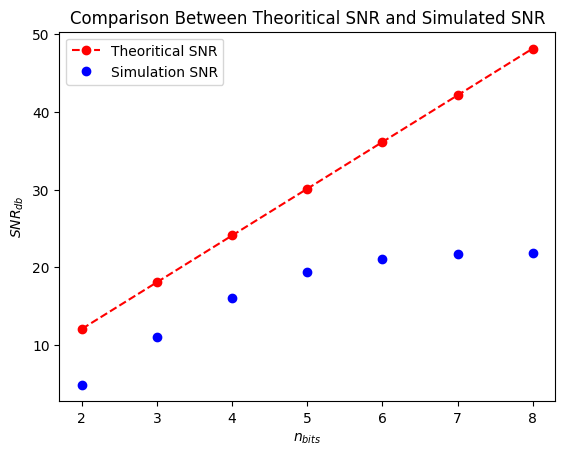

In [15]:
plot_SNR(random_signal=input_signal)

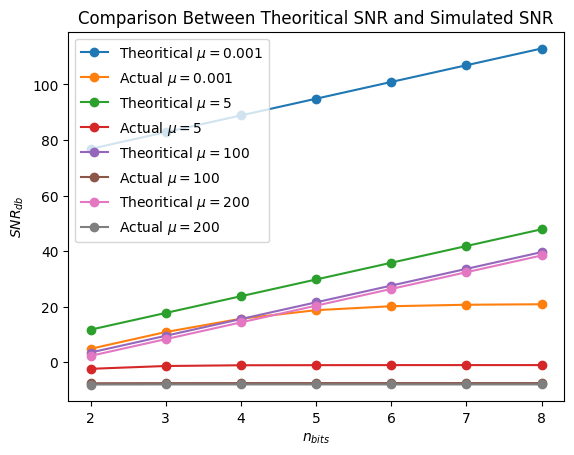

In [ ]:
plot_compressed_signal_SNR(input_signal=input_signal)

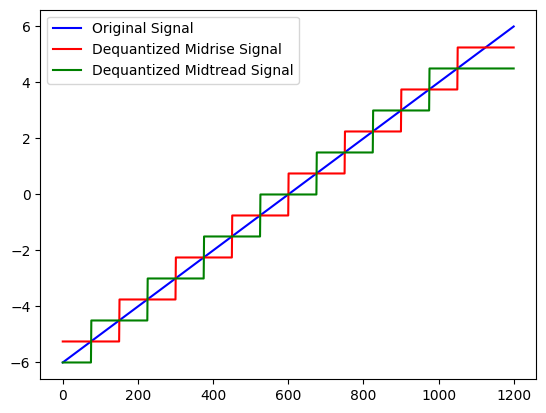

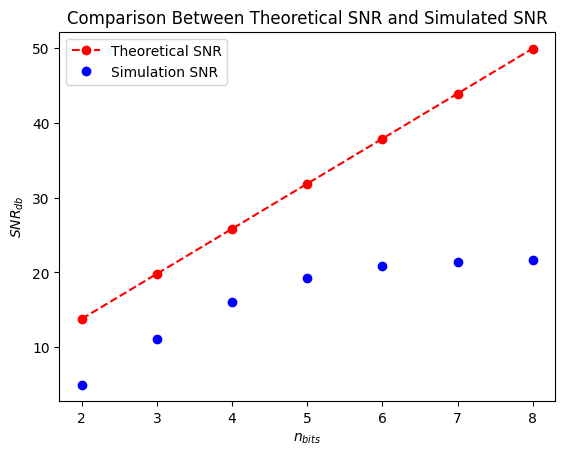

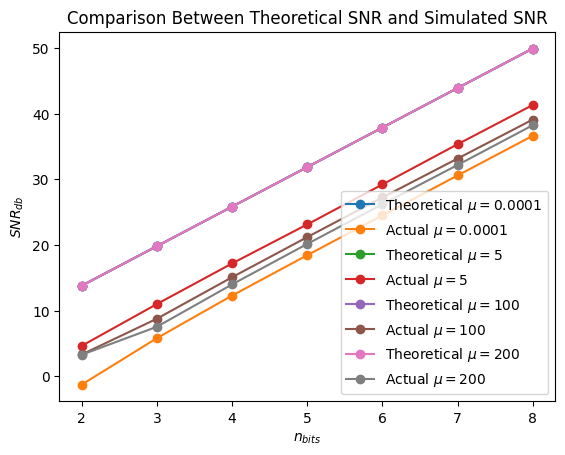

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def UniformQuantizer(in_val, n_bits, xmax, m):
    L = 2 ** n_bits
    delta = 2 * xmax / L
    q_ind = np.floor((in_val - (xmax - m * delta / 2)) / delta)
    q_ind = np.clip(q_ind, 0, L - 1)
    return q_ind.astype(int)

def UniformDequantizer(q_ind, n_bits, xmax, m):
    L = 2**n_bits
    delta = 2 * xmax / L
    deq_val = q_ind * delta + (xmax - m * delta / 2) + delta / 2
    return deq_val

def test_three():
    ramp_signal = np.arange(-6, 6.01, 0.01)
    n_bits = 3
    xmax = 6
    q_ind_midtread = UniformQuantizer(ramp_signal, n_bits, xmax, 1)
    deq_val_midtread = UniformDequantizer(q_ind_midtread, n_bits, xmax, 1)
    q_ind_midrise = UniformQuantizer(ramp_signal, n_bits, xmax, 0)
    deq_val_midrise = UniformDequantizer(q_ind_midrise, n_bits, xmax, 0)

    plt.plot(ramp_signal, ramp_signal, color="b", label="Original Signal")
    plt.plot(ramp_signal, deq_val_midrise, color="r", label="Dequantized Midrise Signal")
    plt.plot(ramp_signal, deq_val_midtread, color="g", label="Dequantized Midtread Signal")

    plt.legend()
    plt.show()

def plot_SNR(random_signal: np.ndarray) -> None:
    n_bits = np.arange(2, 9)
    xmax = 5
    m = 0

    simulated_SNR_values = []
    theoretical_SNR_values = []

    for bits in n_bits:
        q_ind = UniformQuantizer(in_val=random_signal, n_bits=bits, xmax=xmax, m=m)
        deq_val = UniformDequantizer(q_ind=q_ind, n_bits=bits, xmax=xmax, m=m)

        quantization_error = random_signal - deq_val

        E_x2 = np.mean(random_signal**2)
        E_error2 = np.mean(quantization_error**2)

        simulated_SNR = E_x2 / E_error2
        simulated_SNR_db = 10 * np.log10(simulated_SNR)
        theoretical_SNR_db = 6.02 * bits + 1.76  # Theoretical SNR for uniform quantization

        theoretical_SNR_values.append(theoretical_SNR_db)
        simulated_SNR_values.append(simulated_SNR_db)

    plt.plot(n_bits, theoretical_SNR_values, "ro--", label="Theoretical SNR")
    plt.plot(n_bits, simulated_SNR_values, "bo", label="Simulation SNR")
    plt.xlabel(r"$n_{bits}$")
    plt.ylabel(r"$SNR_{db}$")
    plt.title("Comparison Between Theoretical SNR and Simulated SNR")
    plt.legend()
    plt.show()

def plot_SNR_nonuniform(x, Sim, Theo, Sim_labels, Theo_labels, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(Sim_labels)):
        plt.plot(x, Sim[i], marker='o', label=Sim_labels[i])
        plt.plot(x, Theo[i], linestyle='--', label=Theo_labels[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

def mu_law_compression(x, mu):
    return np.sign(x) * (np.log1p(mu * np.abs(x)) / np.log1p(mu))

def mu_law_expansion(y, mu):
    return np.sign(y) * ((1 + mu) ** np.abs(y) - 1) / mu

def mu_law_quantizer(in_val, n_bits, xmax, m, mu):
    compressed_signal = mu_law_compression(x=(in_val / xmax), mu=mu)
    q_ind = UniformQuantizer(in_val=compressed_signal, n_bits=n_bits, xmax=1, m=m)
    deq_val = UniformDequantizer(q_ind=q_ind, n_bits=n_bits, xmax=1, m=m)
    expanded_signal = mu_law_expansion(y=deq_val, mu=mu) * xmax
    return expanded_signal

def plot_compressed_signal_SNR(input_signal: np.ndarray) -> None:
    n_bits = np.arange(2, 9)
    mu_values = [0.0001, 5, 100, 200]

    xmax = max(abs(input_signal))
    m = 0
    
    for mu in mu_values:
        theoretical_SNR_values = []
        simulated_SNR_values = []

        for bits in n_bits:
            quantized_signal = mu_law_quantizer(input_signal, bits, xmax, m, mu)
            quantization_error = input_signal - quantized_signal

            E_x2 = np.mean(input_signal**2)
            E_error2 = np.mean(quantization_error**2)

            simulated_SNR = E_x2 / E_error2
            simulated_SNR_db = 10 * np.log10(simulated_SNR)
            theoretical_SNR_db = 6.02 * bits + 1.76  # Theoretical SNR for uniform quantization

            theoretical_SNR_values.append(theoretical_SNR_db)
            simulated_SNR_values.append(simulated_SNR_db)

        plt.plot(n_bits, theoretical_SNR_values, "o-", label=rf"Theoretical $\mu={mu}$")
        plt.plot(n_bits, simulated_SNR_values, "o-", label=rf"Actual $\mu={mu}$")
        plt.xlabel(r"$n_{bits}$")
        plt.ylabel(r"$SNR_{db}$")
        plt.title("Comparison Between Theoretical SNR and Simulated SNR")
        plt.legend()
    plt.show()

# Generate random input signal
np.random.seed(42)
num_samples = 10000
polarity = np.random.choice([-1, 1], size=num_samples, p=[0.5, 0.5])
magnitude = np.random.exponential(size=num_samples)
input_signal = polarity * magnitude

# Test functions
test_three()
plot_SNR(random_signal=input_signal)
plot_compressed_signal_SNR(input_signal=input_signal)